# 3 Завдання

## 3.1 Виконати завдання iз прикладу i отримати файл iз навченою моделлю для розпiзнавання рукописних цифр. В будь якому графiчному редакторi створити файл iз рукописною цифрою i розпiзнати її. Пояснити результат.

### Імпортуємо значення набору даних MNIST з пакету keras. Вхідні дані мають розмір у 60 000 екземплярів та розширення у 28 * 28 пікселів.

In [4]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

*Завантаження датасету MNIST*

### Переглянемо перші 25 зображень та відповідні їм індекси за допомогою модуля matplotlib.pyplot.

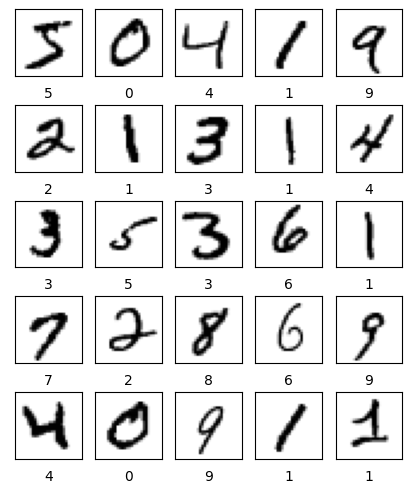

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 6))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

*Зображення перших двадцяти п'яти елементів*

### Робимо перетворення тривимірного масиву в двовимірний масив типу float 32. Далі нормалізовуємо його, щоб отримати значення в інтервалі від [0, 1]. Оскільки маємо колір, то зрозуміло, що його можна закодувати у вигляді байта, пригадуючи RGB, де є 255 * 255 * 255 кольорів для червоного, зеленого, блакитного кольорів. Тому треба розділити датасет на навчальний та тестові набори і розділити кожний з елементів на 255.

In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

*Розбиття на навчальні та тестові дані і їхня нормалізація*

### У результаті маємо, що кожне зображення - це вектор з 784 елементів від 0 до 1.

### Тепер підготуємо мітки, а саме будемо завантажувати масиви із відгуками на кожне тестове зображення. Після цього передамо нейронній мережі навчальні дані train_images та train_labesls. Так мережа навчиться зіставлятии зображення з мітками. to_categorical - функція, що дозволяє перетворити масив NumPy, що містить числа різних категорій, у матрицю, яка має двійкові значення та має стовпці, що дорівнюють кількості категорій у даних.

In [7]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

*Підготування міток*

### Оберемо архітектуру моделі у вигляді Sequential, оскільки вона є простою послідовністю шарів - вихідного шару, який складається із 28 * 28 = 784 нейронів, тобто кожному пікселю зображення відповідає один нейрон. За допомогою методу add створимо прихований шар, який є функцією, на вхід якої подається тензор і на виході отримується тензор, можливо, іншого розміру. Використаємо щільні шари, де кожен нейрон одного шару зв'язаний з нейроном іншого. Прихований шар має 512 нейронів, вихідний - 10. Функціями активації є relu та softmax.

In [8]:
from keras import models, layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))

*Побудова архітектури моделі*

### Скомпілюємо мережу, привівши її до сумісного вигляду із TensorFlow. Налаштуємо три параметри.

### По-перше, оптимізатор - це конкретний алгоритм, що буде оновлювати ваги в процесі навчання.

### По-друге, функція втрат - функція, яку оптимізатор використовує для оцінювання якості та коригування навчання.

### По-третє, метрики - об'єкти, що оцінюють результати навчання за такими параметрами як точність, коректність, повнота.

### Після визначення цих параметрів процес компіляції виконується методом .compile(). Оскільки ми вирішуємо задачу класифікації із багатьма класами, то використаємо такі параметри.

In [9]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

*Компіляція моделі*

### Навчання моделі. Викличемо метод fit для навчання, де процес адаптації відбувається у подання пакетів фіксованого розміру до моделі, яка ітеративно підганяє вагові коефіцієнти відповідно до виставлених міток з файлу міток. Кожна ітерація є епохою. За кожної епохи виправляється порушення відгуків новими змінними вагових коефіцієнтів.

In [10]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


2023-03-24 13:40:11.263794: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 3s 6ms/step - loss: 0.2607 - accuracy: 0.9258
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1071 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0704 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0511 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0381 - accuracy: 0.9889


*Навчання моделі*

### Перевіримо модель на контрольному наборі даних.

In [11]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.0670 - accuracy: 0.9781


*Перевірка моделі*

### Зробимо збереження моделі командою model.save у форматі HDF5, що містить архітектуру, ваги, конфігурацію тренувань, стан оптимізатора.

In [12]:
network.save('my_model.h5')

*Збереження моделі*

### Завантажуємо модель з файлу.

In [13]:
from keras.models import load_model
model = load_model('my_model.h5')

*Завантаження моделі*

### Покажемо тестові картинки, на яких ми будемо тестувати модель. Картинки не стиснені, імпортуємо клас Image з модуля IPython для відображення. 

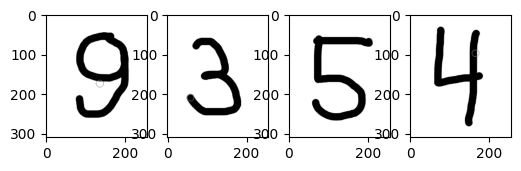

In [14]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = []
for img_path in glob.glob(  '/home/choleraplague/'\
                            'university/MachineLearning/'\
                            'Lab5/images/mnist/*.png'):
    images.append(mpimg.imread(img_path))

fig, axes = plt.subplots(1, 4, figsize=(6, 4))
for i, image in enumerate(images):
    axes[i].imshow(image)

*Тестові зображення*

### Завантажимо їх в OpenCV як сіре зображення і отримуємо дані у форматі ndarray. Потім переформатуємо цей масив до розміру, на якому відбувалося тренування нашої моделі.

(1, 784)
(1, 784)
(1, 784)
(1, 784)


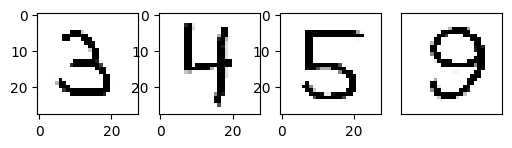

In [19]:
import cv2
images = []
fig, axes = plt.subplots(1, 4, figsize=(6, 4))
for i, im in enumerate([3, 4, 5, 9]):
    tst = 255 - cv2.imread(f'images/mnist/{im}.png', 0)
    tst_res = cv2.resize(tst, (28, 28))
    tst = tst_res.reshape((1, 28*28))
    tst = tst.astype('float32') / 255
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    axes[i].imshow(tst_res, cmap=plt.cm.binary)
    images.append(tst)

*Обробка зображень*

### Спрогнозуємо результати, провівши тестування моделі.

In [16]:
for tst in images:
    pred = list(model.predict(tst)[0])
    print(pred.index(max(pred)))

1/1 [==============================] - 0s 52ms/step
3
1/1 [==============================] - 0s 16ms/step
4
1/1 [==============================] - 0s 22ms/step
5
1/1 [==============================] - 0s 21ms/step
9


*Спрогнозовані результати*

### Отже, тестування свідчать про успішну роботу нейронної мережі. Це означає, що набір даних, на якому вона тренувала, був якісним. До того ж параметри були підібрані правильно, а саме: optimizer='rmsprop', loss='categorical_crossentropy', metrics='accuracy', - які чудово підходять для задач класифікації із багатьма класами, наприклад множина цифр, де кожний елемент - окремий клас зображень. Однак, для повної оцінки роботи мережі потрібно провести тестування на більш широкому діапазоні зображень цифр та провести аналіз результатів.

## 3.2 Спроектувати i розробити нейронну мережу на основi набору даних Cifar10

### Імпортуємо значення набору даних MNIST з пакету keras. Вхідні дані мають розмір у 60 000 екземплярів та розширення у 32 * 32 пікселів.

In [74]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

*Завантаження датасету Cifar10*

### Змінимо розмірність y_train, оскільки він є двовимірним масивом, у якому кожен рядок має лише один елемент. Тож приберемо цю незручність і перетворимо його в одновимірний масив.

In [75]:
print(y_train[:4])
y_train = y_train.reshape(-1,)
print(y_train[:4])

[[6]
 [9]
 [9]
 [4]]
[6 9 9 4]


*Перетворення y_train в одновимірний масив*

### Позначимо індекси для кращого розуміння, що кожне число в y_train означає.

In [76]:
indexes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

*Індекси, тобто імена класів*

### Переглянемо перші 25 зображень та відповідні їм індекси за допомогою модуля matplotlib.pyplot.

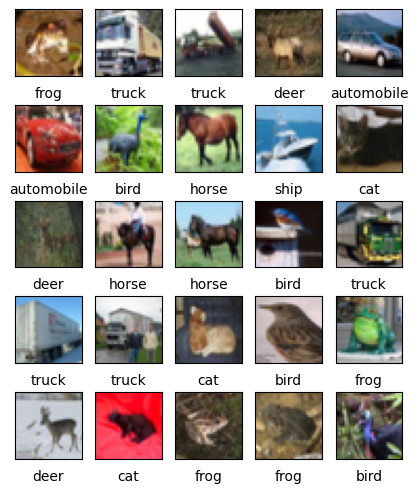

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 6))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(indexes[y_train[i]])

*Зображення перших двадцяти п'яти елементів*

### Нормалізовуємо датасет, щоб отримати значення в інтервалі від [0, 1]. Оскільки маємо колір, то треба розділити кожний з елементів на 255.

In [78]:
X_train = X_train / 255
X_test = X_test / 255

*Нормалізація даних*

### За архітектуру моделі оберемо Sequential. Використаємо щільні шари, де кожен нейрон одного шару зв  язаний з нейроном іншого. Прихований шар має по 64 нейрони. Оскільки у нас є 10 індексів, то і вихідний шар міститиме 10 нейронів.

 ### Функціями активації є relu та softmax. Використаємо Flatten для перетворення багатовимірних вхідних данних до одновимірних. 

### Використаємо паттерн CNN( Convolutional Neural Network ) - це мережа, яка є одним із методів класифікації та розпізнавання зображень у нейронних мережах. Вона призначена для обробки даних кількома шарами масивів. Цей тип нейронної мережі використовується в таких програмах, як розпізнавання зображень. Основна відмінність між CNN та іншими нейронними мережами полягає в тому, що CNN приймає вхідні дані як двовимірний масив. І він працює безпосередньо з зображеннями, а не зосереджується на виділенні ознак, як це роблять інші нейронні мережі.

### Convolutional Neural Networks мають 4 шари: convolutional, relu шар, pooling, fully connected.

### Початковий крок у вилученні функцій із вхідного зображення виконується згортковим шаром( convolutional layer ). Використовуючи вхідну матрицю, згортковий рівень підтримує зв’язок між пікселями під час вивчення характеристик зображення. Цей математичний процес включає два входи: матрицю зображення та ядро або фільтр.

### Функція активації Rectified Linear Unit (ReLU) запускає вузол лише тоді, коли вхід перевищує певний поріг. Коли вхід нижче нуля, вихід дорівнює нулю; однак, як тільки він перевищує поріг, він зберігає лінійний зв'язок із залежною змінною.

### Під час попередньої обробки зображення шар об’єднання( pooling layer ) є ключовим компонентом, який допомагає зменшити параметри зображення, коли воно стає надмірно великим. Це «зменшення масштабу» зображення досягається шляхом об’єднання, яке можна розглядати як стиснення зображення для зменшення його щільності, подібно до його зменшення.

### Максимальне об’єднання( max pooling ) — це процес дискретизації на основі вибірки. Основна мета максимального об’єднання полягає в тому, щоб зменшити масштаб представлення вхідних даних, зменшивши його розмірність і дозволивши зробити припущення щодо функції, що міститься в групуванні підобласті.

In [79]:
from keras import models, layers
network = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3),
                  activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3,3),
                  activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

*Побудова архітектури моделі*

### Скомпілюємо мережу, привівши її до сумісного вигляду із TensorFlow. Налаштуємо оптимізатор, функцію втрат, метрики.

### Використаємо оптимізатор "adam", який працює на основі градієнтного спуску. У якості функції втрат використаємо Sparse Categorical Crossentropy, у якій передбачені ймовірності порівнюються з істинними мітками, де істинні мітки є цілими числами, що відповідають індексу правильного класу. Це на відміну від категоріальної крос-ентропії, де істинні мітки є векторами, закодованими одним способом.

In [80]:
network.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

*Компіляція моделі*

### Навчання моделі.

In [81]:
network.fit(X_train, y_train, epochs=5)

Epoch 1/5


2023-03-24 12:51:51.326782: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


   4/1563 [..............................] - ETA: 1:17 - loss: 2.3103 - accuracy: 0.1562

2023-03-24 12:51:52.578288: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 19663488 exceeds 10% of free system memory.
2023-03-24 12:51:52.579120: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 19663488 exceeds 10% of free system memory.
2023-03-24 12:51:52.594929: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 14191200 exceeds 10% of free system memory.


1563/1563 [==============================] - 25s 16ms/step - loss: 1.4395 - accuracy: 0.4836
Epoch 2/5
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1031 - accuracy: 0.6119
Epoch 3/5
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9733 - accuracy: 0.6598
Epoch 4/5
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8934 - accuracy: 0.6880
Epoch 5/5
1563/1563 [==============================] - 24s 16ms/step - loss: 0.8298 - accuracy: 0.7111


*Навчання моделі*

### Перевіримо модель на контрольному наборі даних.

In [82]:
test_loss, test_acc = network.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9438 - accuracy: 0.6752


*Перевірка моделі*

### Зробимо збереження моделі командою model.save у форматі HDF5, що містить архітектуру, ваги, конфігурацію тренувань, стан оптимізатора.

In [83]:
network.save('cifar10.h5')

*Збереження моделі*

### Завантажуємо модель з файлу.

In [84]:
from keras.models import load_model
model = load_model('cifar10.h5')

*Завантаження моделі*

### Покажемо тестові картинки, на яких ми будемо тестувати модель.

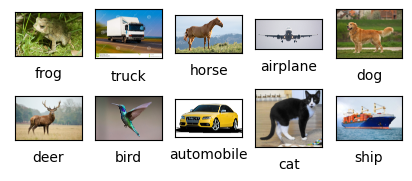

In [85]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = []
image_names = []
for img_path in glob.glob(  '/home/choleraplague/'\
                            'university/MachineLearning/'\
                            'Lab5/images/cifar10/*.png'):
    image_names.append(img_path.split('/')[-1].split('.')[0])
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(5, 2))
for i, name in enumerate(image_names):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
    plt.xlabel(name)

*Тестові зображення*

### Завантажимо їх в PIL у форматі ndarray. Потім переформатуємо цей масив до розміру, на якому відбувалося тренування нашої моделі.

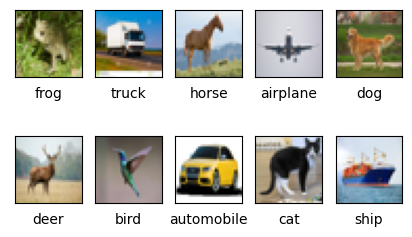

In [86]:
from PIL import Image
import numpy as np

low_images = []

plt.figure(figsize=(5, 3))
for i, im in enumerate(image_names):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    tst = Image.open(f'images/cifar10/{im}.png')

    tst_res = tst.resize((32, 32))
    plt.xlabel(im)
    plt.imshow(tst_res)
    pix = np.array(tst_res)
    # pix = pix.reshape((1, 32*32*3))
    pix = pix.astype('float32') / 255
    low_images.append(pix)
low_images = np.array(low_images)

*Обробка зображень*

### Спрогнозуємо результати, провівши тестування моделі.

In [87]:
pred = model.predict(low_images)
pred_indexes = [indexes[i] for i in [np.argmax(el) for el in pred]]
pred_indexes

1/1 [==============================] - 0s 68ms/step


['frog',
 'airplane',
 'bird',
 'airplane',
 'deer',
 'deer',
 'bird',
 'automobile',
 'cat',
 'ship']

*Спрогнозовані результати*

### Отже, тестування свідчать про відносно успішну роботу нейренної мережі. Маємо те, що мережа сплутала 3 об'єкти: вантажівку з літаком, собаку з оленем та коня з птахою. Як ми побачили точність нейронної мережі оцінюється в 67.52 %. Це означає, що хоч підбір даних був і якісним, але архітектура мережі не дала змоги досягти більш виоких результатів. Тож треба зробити шарів у мережі та витратити час на підбір оптимального набору даних.

## 3.3 Спроектувати i розробити нейронну мережу на основi набору даних FMNIST

### Імпортуємо значення набору даних MNIST з пакету keras. Вхідні дані мають розмір у 60 000 екземплярів та розширення у 32 * 32 пікселів.

In [115]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

*Завантаження датасету FMNIST*

### Позначимо індекси для кращого розуміння, що кожне число в y_train означає.

In [116]:
indexes = ['T-shirt/top', 'Trouser', 'Pullover',
           'Dress', 'Coat', 'Sandal', 'Shirt',
           'Sneaker', 'Bag', 'Ankle']

*Індекси, тобто імена класів*

### Переглянемо перші 25 зображень та відповідні їм індекси за допомогою модуля matplotlib.pyplot.

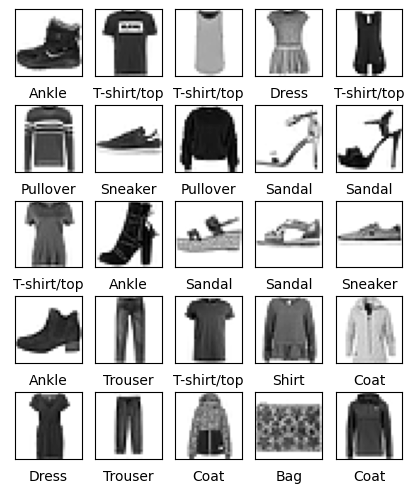

In [117]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 6))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(indexes[train_labels[i]])

*Зображення перших двадцяти п'яти елементів*

### Робимо перетворення тривимірного масиву в двовимірний масив типу float 32. Далі нормалізовуємо його, щоб отримати значення в інтервалі від [0, 1]. 

In [118]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

*Нормалізація даних*

### За архітектуру моделі оберемо Sequential. Використаємо щільні шари, де кожен нейрон одного шару зв  язаний з нейроном іншого. Прихований шар маює по 512 нейронів. Оскільки у нас є 10 індексів, то і вихідний шар міститиме 10 нейронів.

### 

In [119]:
from keras import models, layers
network = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(28 * 28, )),
    layers.Dense(512, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

*Побудова архітектури моделі*

### Скомпілюємо мережу, привівши її до сумісного вигляду із TensorFlow. Налаштуємо оптимізатор, функцію втрат, метрики.

In [120]:
network.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

*Компіляція моделі*

### Навчання моделі.

In [121]:
network.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5096 - accuracy: 0.8150
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3907 - accuracy: 0.8600
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3748 - accuracy: 0.8685
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3690 - accuracy: 0.8729
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3601 - accuracy: 0.8756


*Навчання моделі*

### Перевіримо модель на контрольному наборі даних.

In [122]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4157 - accuracy: 0.8649


*Перевірка моделі*

### Зробимо збереження моделі командою model.save у форматі HDF5, що містить архітектуру, ваги, конфігурацію тренувань, стан оптимізатора.

In [123]:
network.save('fmnist.h5')

*Збереження моделі*

### Завантажуємо модель з файлу.

In [124]:
from keras.models import load_model
model = load_model('fmnist.h5')

*Завантаження моделі*

### Покажемо тестові картинки, на яких ми будемо тестувати модель.

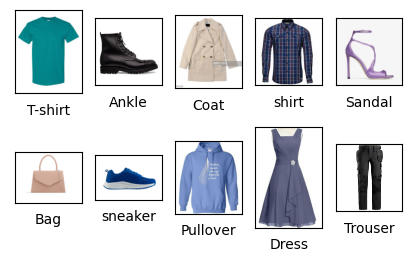

In [125]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = []
image_names = []
for img_path in glob.glob(  '/home/choleraplague/'\
                            'university/MachineLearning/'\
                            'Lab5/images/fmnist/*.jpg'):
    image_names.append(img_path.split('/')[-1].split('.')[0])
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(5, 3))
for i, name in enumerate(image_names):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(name)

*Тестові зображення*

### Завантажимо їх в PIL у форматі ndarray. Потім переформатуємо цей масив до розміру, на якому відбувалося тренування нашої моделі.

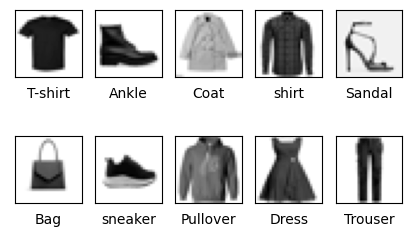

In [126]:
import PIL
import numpy as np

low_images = []

plt.figure(figsize=(5, 3))
for i, im in enumerate(image_names):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    tst = PIL.ImageOps.invert(
        PIL.Image.open(f'images/fmnist/{im}.jpg').convert('L'))
    tst_res = tst.resize((28, 28))
    plt.xlabel(im)
    plt.imshow(tst_res, cmap=plt.cm.binary)
    pix = np.array(tst_res)
    pix = pix.reshape((1, 28*28))
    pix = pix.astype('float32') / 255
    low_images.append(pix)
low_images = np.array(low_images)

*Обробка зображень*

### Спрогнозуємо результати, провівши тестування моделі.

In [127]:
for tst in low_images:
    pred = list(model.predict(tst)[0])
    print(indexes[pred.index(max(pred))])

1/1 [==============================] - 0s 67ms/step
T-shirt/top
1/1 [==============================] - 0s 18ms/step
Bag
1/1 [==============================] - 0s 16ms/step
Shirt
1/1 [==============================] - 0s 17ms/step
Shirt
1/1 [==============================] - 0s 17ms/step
Bag
1/1 [==============================] - 0s 16ms/step
Sandal
1/1 [==============================] - 0s 16ms/step
Sandal
1/1 [==============================] - 0s 16ms/step
Coat
1/1 [==============================] - 0s 17ms/step
Dress
1/1 [==============================] - 0s 16ms/step
Trouser


*Спрогнозовані результати*

### Отже, тестування свідчать про відносно неуспішну роботу нейренної мережі. Як ми побачили точність на тестових даних нейронної мережі оцінюється в 87.68 %. Це означає, що хоч підбір даних був якісним, але треба мати на увазі, що мережа по суті сплутала два об'єкти: сандаль з сумкою та чобіт із сумкою. На мій погляд, достатньо складно для нейромережі пояснити, чим пальто відрізняється від пуловера чи сорочки, оскільки на малюнках у 28 * 28 піеселів ця різниця і деталі втрачаються. Я вважаю, що треба збільшувати роздільну здатність картинок та будувати складнішу архітектуру моделі.